Statistics saved to image_statistics_highres.csv
       width      height  avg_intensity  std_intensity  aspect_ratio
count  100.0  100.000000     100.000000     100.000000    100.000000
mean   528.0  488.400000     113.239056      69.762742      1.081082
std      0.0    0.492366      11.642852       2.014666      0.001089
min    528.0  488.000000      93.324820      63.864980      1.079755
25%    528.0  488.000000     103.807410      68.740808      1.079755
50%    528.0  488.000000     112.924240      70.290197      1.081967
75%    528.0  489.000000     122.064829      70.930254      1.081967
max    528.0  489.000000     146.089646      73.170860      1.081967


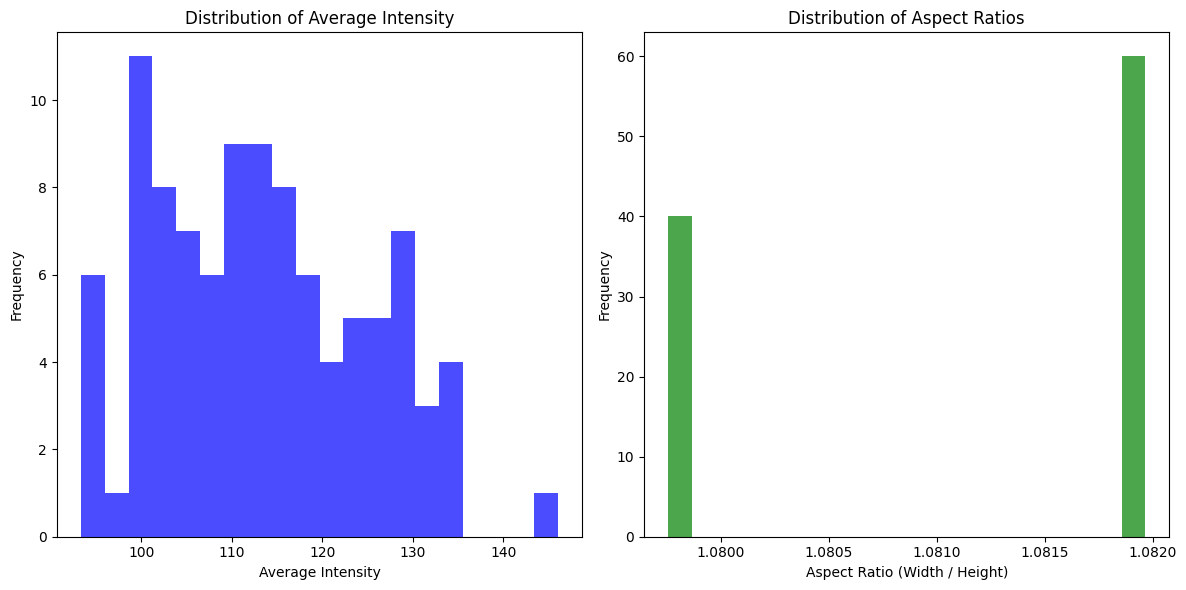

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# Parameters
image_folder = "equal_tiles_highres"  # Folder containing the images
output_csv = "image_statistics_highres.csv"  # Save stats to a CSV file

# Load images
image_paths = glob(os.path.join(image_folder, "*.png"))
if not image_paths:
    print("No images found in the specified folder.")
    exit()

# Data storage
data = []

# Loop through each image
for image_path in image_paths:
    try:
        # Read image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Image {image_path} is corrupt or unreadable.")
            continue

        # Extract statistics
        height, width, channels = image.shape
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        avg_intensity = np.mean(grayscale)  # Average pixel intensity
        std_intensity = np.std(grayscale)  # Pixel intensity variation
        color_hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # Histogram for the blue channel

        # Store data
        data.append({
            "file_name": os.path.basename(image_path),
            "width": width,
            "height": height,
            "avg_intensity": avg_intensity,
            "std_intensity": std_intensity,
            "aspect_ratio": width / height,
        })

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Create a DataFrame for analysis
df = pd.DataFrame(data)

# Save to CSV
df.to_csv(output_csv, index=False)
print(f"Statistics saved to {output_csv}")

# Display some EDA results
print(df.describe())

# Visualization: Histograms of intensity and aspect ratios
plt.figure(figsize=(12, 6))

# Average intensity distribution
plt.subplot(1, 2, 1)
plt.hist(df["avg_intensity"], bins=20, color="blue", alpha=0.7)
plt.title("Distribution of Average Intensity")
plt.xlabel("Average Intensity")
plt.ylabel("Frequency")

# Aspect ratio distribution
plt.subplot(1, 2, 2)
plt.hist(df["aspect_ratio"], bins=20, color="green", alpha=0.7)
plt.title("Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [2]:
from skimage.feature import hog

# Extract HOG features
features, _ = hog(grayscale, visualize=True)
data[-1]["hog_mean"] = np.mean(features)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(image_features)


NameError: name 'image_features' is not defined